### Deteksi Tepi Menggunakan Operator Sobel

In [14]:
#import library
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import math
%matplotlib inline

In [15]:
#read image grayscale
image = cv2.imread('butterfly.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [16]:
height, width, _ = rgb.shape
print(f"Ukuran gambar: {width} x {height}")

Ukuran gambar: 271 x 186


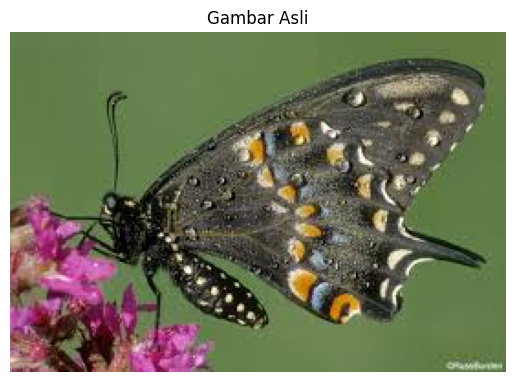

In [17]:
plt.imshow(rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()

### Konversi Grayscale

In [18]:
def convert_to_grayscale(pixel):
    r, g, b = pixel
    gray = int(0.299 * r + 0.587 * g + 0.114 * b)  # Rumus standar konversi RGB ke grayscale
    return gray

In [19]:
grayscale_img = []
for y in range(height):
    row = []
    for x in range(width):
        pixel = rgb[y, x]  # Ambil pixel di koordinat (y,x)
        r, g, b = pixel
        gray = convert_to_grayscale(pixel)
        row.append(gray)

        # Menampilkan nilai piksel tiap 100 piksel sebagai sampel
        if y % 100 == 0 and x % 100 == 0:
            print(f'Pixel[{y},{x}] -> R: {r}, G: {g}, B: {b}, Gray: {gray}')
    grayscale_img.append(row)

Pixel[0,0] -> R: 98, G: 126, B: 75, Gray: 111
Pixel[0,100] -> R: 104, G: 131, B: 78, Gray: 116
Pixel[0,200] -> R: 95, G: 122, B: 69, Gray: 107
Pixel[100,0] -> R: 92, G: 60, B: 47, Gray: 68
Pixel[100,100] -> R: 57, G: 56, B: 38, Gray: 54
Pixel[100,200] -> R: 200, G: 188, B: 130, Gray: 184


In [20]:
grayscale_img = np.array(grayscale_img, dtype=np.uint8)
grayscale_img

array([[111, 111, 111, ..., 109, 109, 109],
       [111, 111, 111, ..., 109, 109, 109],
       [111, 111, 111, ..., 109, 109, 109],
       ...,
       [166, 152, 142, ..., 186,  87, 102],
       [148, 113, 110, ..., 117, 110, 105],
       [131,  97,  94, ..., 104, 103, 102]], dtype=uint8)

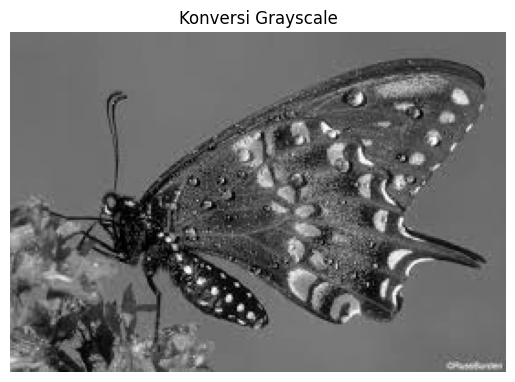

In [21]:
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Konversi Grayscale')
plt.show()

In [22]:
#kernel operator sobel

Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) #Deteksi perubahan horizontal
Gy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) #Deteksi perubahan vertikal

In [23]:
def apply_sobel_operator(img):
    # Siapkan array kosong untuk menyimpan hasil magnitudo gradien
    img = grayscale_img.astype(np.int32)
    gradient_magnitude = np.zeros((height, width), dtype=np.int32)

    # Looping tiap piksel, kecuali tepi
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            gx = 0
            gy = 0

            # Hitung konvolusi 3x3 untuk Gx dan Gy
            for i in range(3):
                for j in range(3):
                    pixel = img[y + i - 1, x + j - 1]
                    gx += Gx[i][j] * pixel
                    gy += Gy[i][j] * pixel

            # Hitung magnitudo gradien dan batasi maksimum 255
            magnitude = math.sqrt(gx**2 + gy**2)
            gradient_magnitude[y, x] = min(int(magnitude), 255)

    return gradient_magnitude.astype(np.uint8)

In [24]:
edges = apply_sobel_operator(grayscale_img)
edges

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 182, 247, ..., 255, 255,   0],
       [  0, 236, 219, ..., 211, 120,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

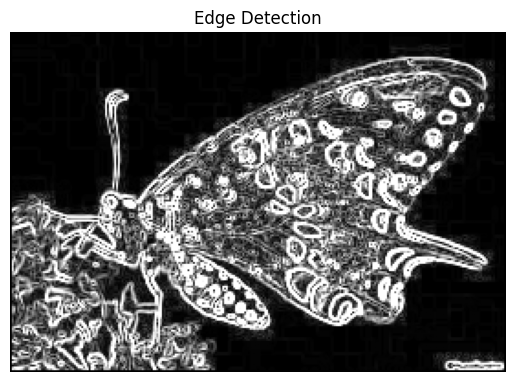

In [25]:
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')
plt.show()